## Seaborn
1. It is data visualaization libary for python that is build on top of matplotlib

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


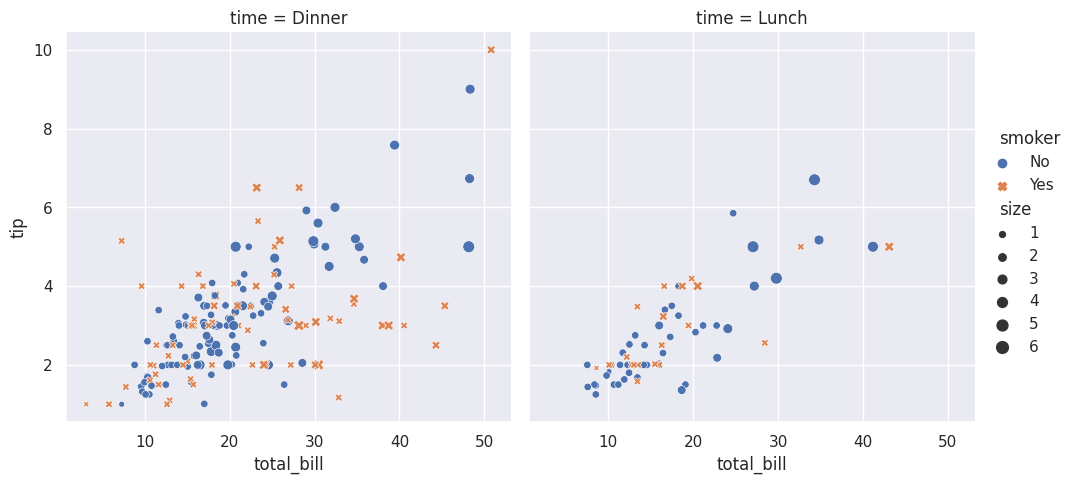

In [22]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
df = pd.read_csv(url)
print(df.head())
# relplot : plot the relationship between multiple features
sns.relplot(data = df,
  x = "total_bill", y = "tip", col= "time",
  hue = "smoker", style= "smoker",size= "size",
)

    align choice  time  coherence  firing_rate
0    dots     T1   -80        0.0    33.189967
1    dots     T1   -80        3.2    31.691726
2    dots     T1   -80        6.4    34.279840
3    dots     T1   -80       12.8    32.631874
4    dots     T1   -80       25.6    35.060487
..    ...    ...   ...        ...          ...
843  sacc     T2   300        3.2    33.281734
844  sacc     T2   300        6.4    27.583979
845  sacc     T2   300       12.8    28.511530
846  sacc     T2   300       25.6    27.009804
847  sacc     T2   300       51.2    30.959302

[848 rows x 5 columns]


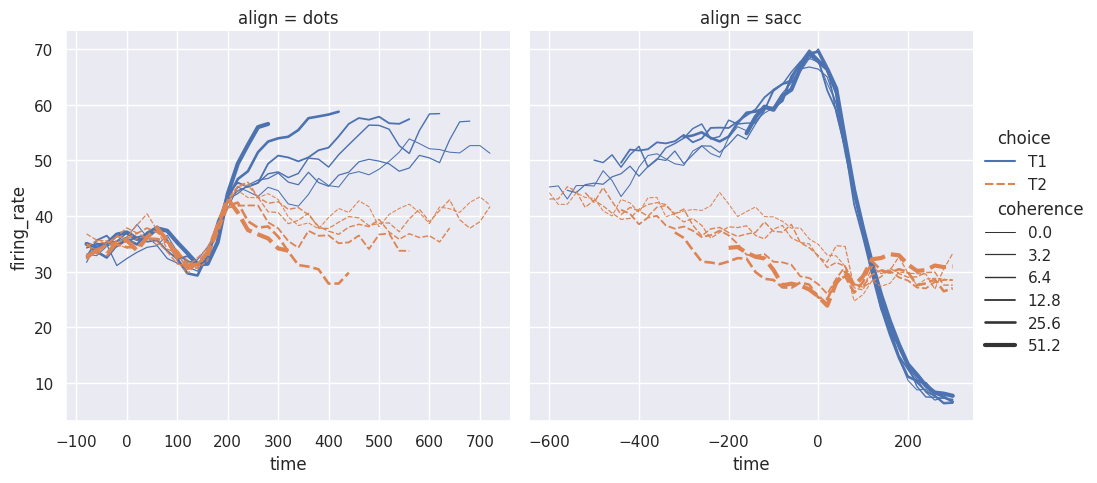

In [18]:
#@title A high-level API for statistical graphics
df2 = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/dots.csv")
print(df2)

#  #######
sns.relplot(
    data= df2, kind="line",
    x = "time",y= "firing_rate", col="align",
    hue= "choice", size= "coherence", style="choice",
    facet_kws= dict(sharex= False)
)


     subject  timepoint event    region    signal
0        s13         18  stim  parietal -0.017552
1         s5         14  stim  parietal -0.080883
2        s12         18  stim  parietal -0.081033
3        s11         18  stim  parietal -0.046134
4        s10         18  stim  parietal -0.037970
...      ...        ...   ...       ...       ...
1059      s0          8   cue   frontal  0.018165
1060     s13          7   cue   frontal -0.029130
1061     s12          7   cue   frontal -0.004939
1062     s11          7   cue   frontal -0.025367
1063      s0          0   cue  parietal -0.006899

[1064 rows x 5 columns]


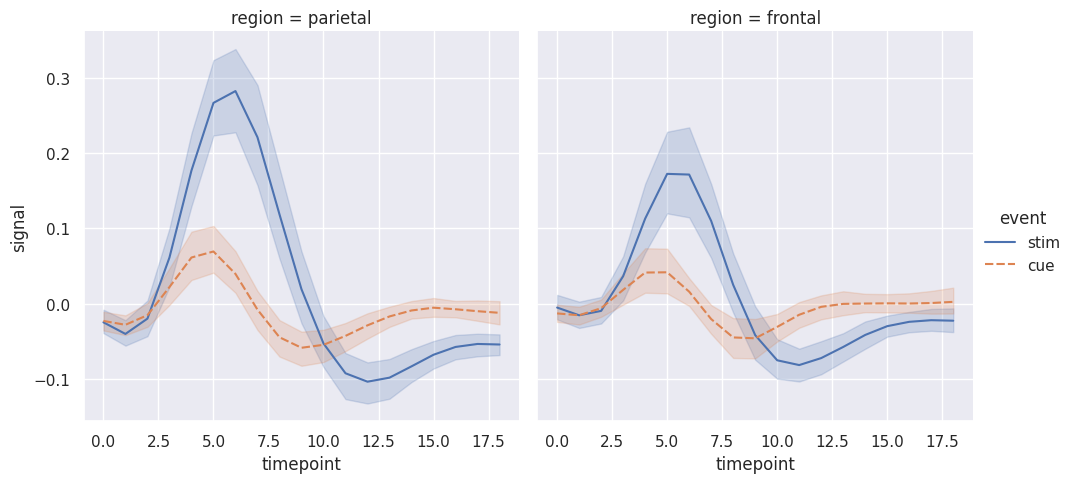

In [24]:
#@title Statistical estimation
df3 = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/fmri.csv")
print(df3)

sns.relplot(
    data = df3, kind = "line",
    x = "timepoint", y ="signal", col= "region",
    hue="event", style= "event",
)

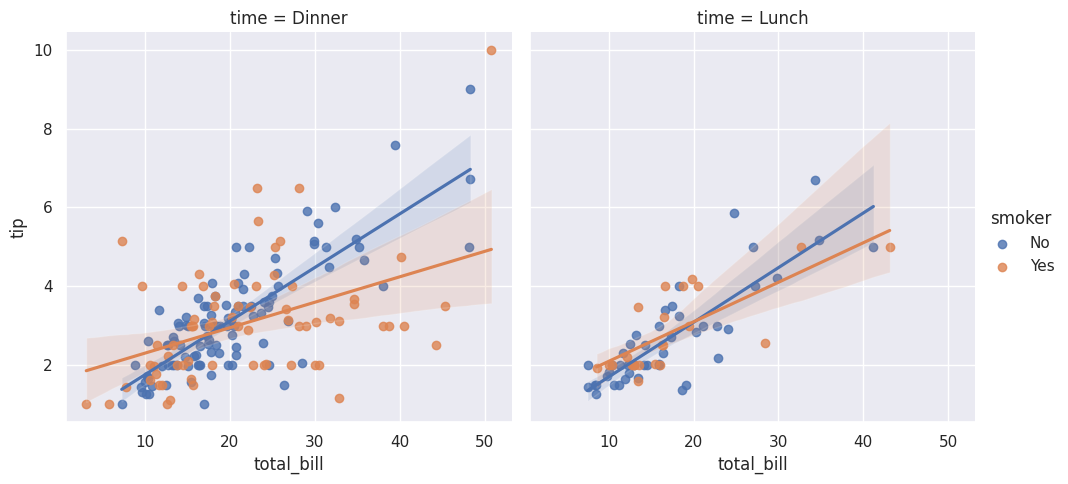

In [25]:
#enhance a scatterplot by including a linear regression model (and its uncertainty) using lmplot():
sns.lmplot(data=df, x= "total_bill", y = "tip", col= "time", hue= "smoker")

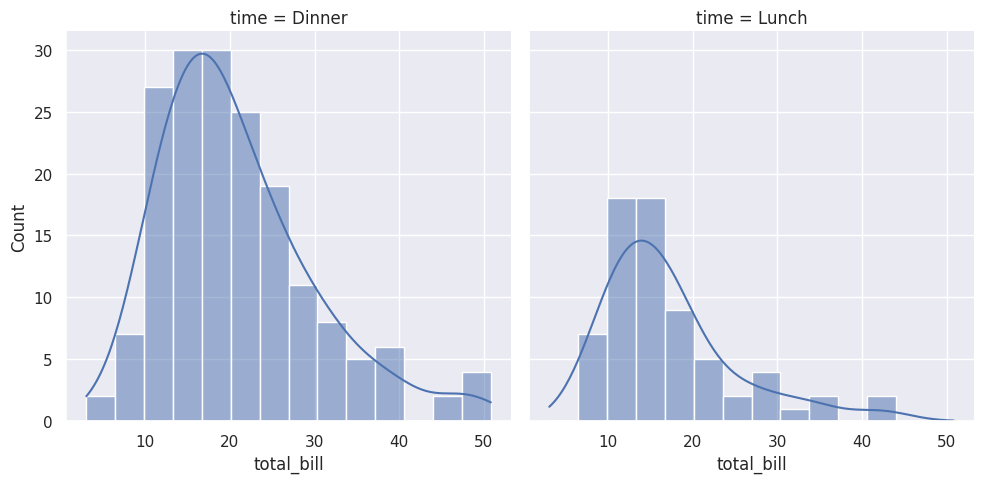

In [26]:
#@title Distributional representations
#displot() supports several approaches to visualizing distributions. kde == karnel density estimation
sns.displot(data = df, x= "total_bill", col="time", kde=True)

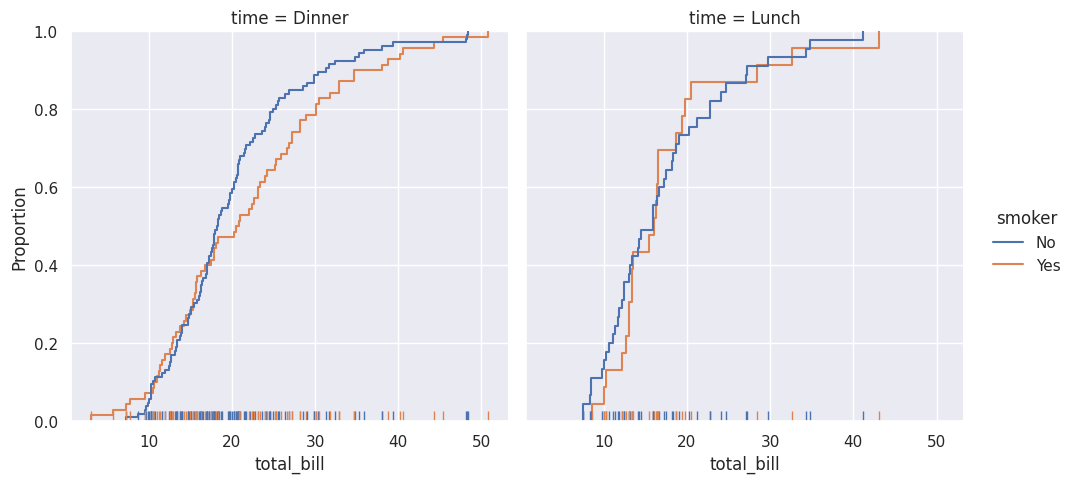

In [27]:
sns.displot(data=df, kind="ecdf", x= "total_bill", col="time", hue="smoker", rug= True)

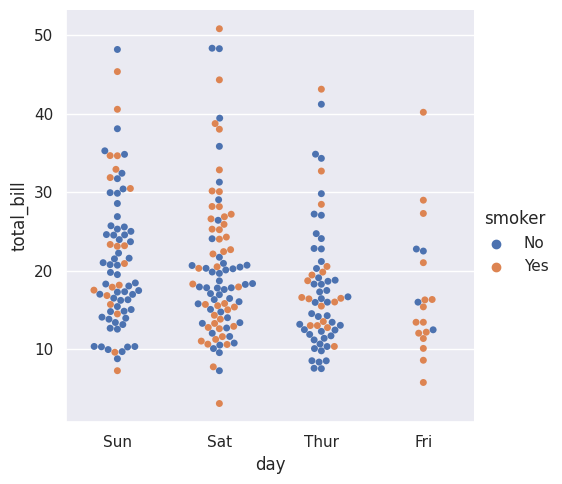

In [29]:
#@title Plots for categorical data


#“swarm” plot: a scatter plot that adjusts the positions of the points along the categorical axis so that they don’t overlap:
sns.catplot(data=df, kind= "swarm", x="day", y = "total_bill", hue="smoker")

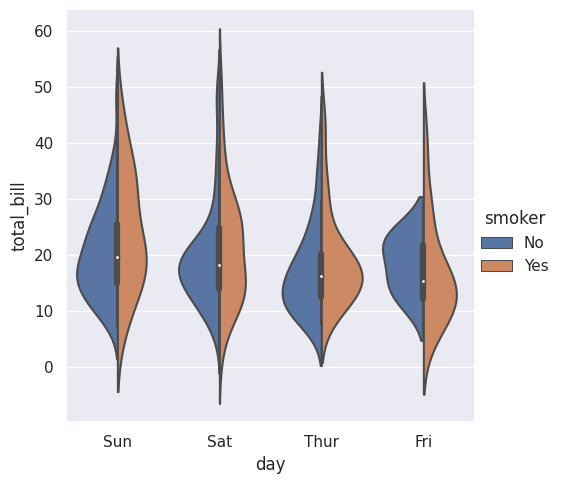

In [30]:
#you could use kernel density estimation to represent the underlying distribution that the points are sampled from:

sns.catplot(data=df, kind= "violin", x="day", y="total_bill", hue = "smoker", split=True)

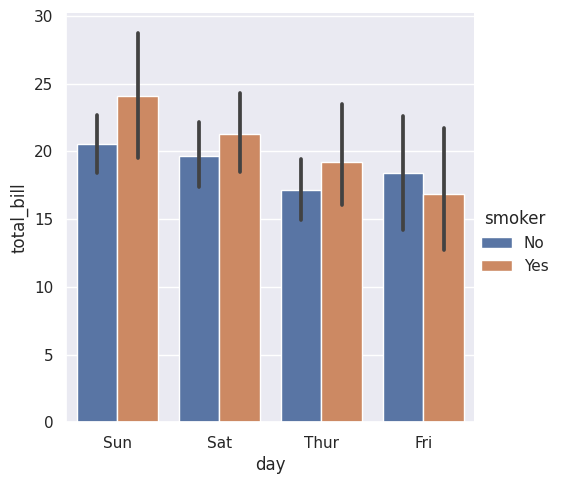

In [32]:
#you could show only the mean value and its confidence interval within each nested category:
sns.catplot(data=df, kind = "bar", x="day", y = "total_bill", hue= "smoker" )

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2     

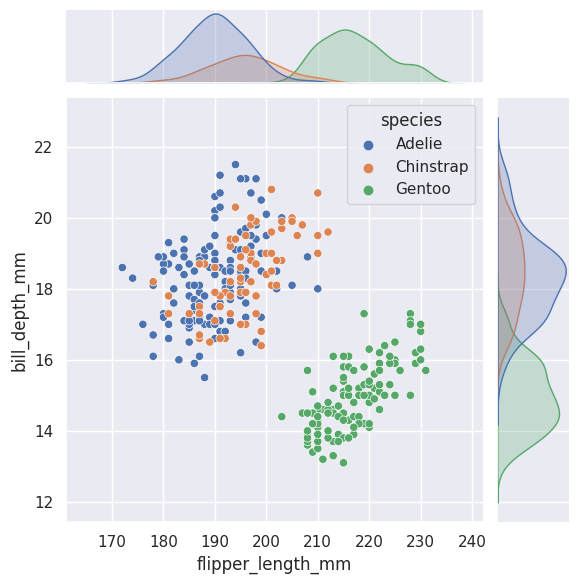

In [34]:
#@title Multivariate views on complex datasets

df4 = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
print(df4)

# jointplot : ocuses on a single relationship. It plots the joint distribution between two variables along with each variable’s marginal distribution:

sns.jointplot(data=df4, x = "flipper_length_mm", y="bill_depth_mm", hue = "species")


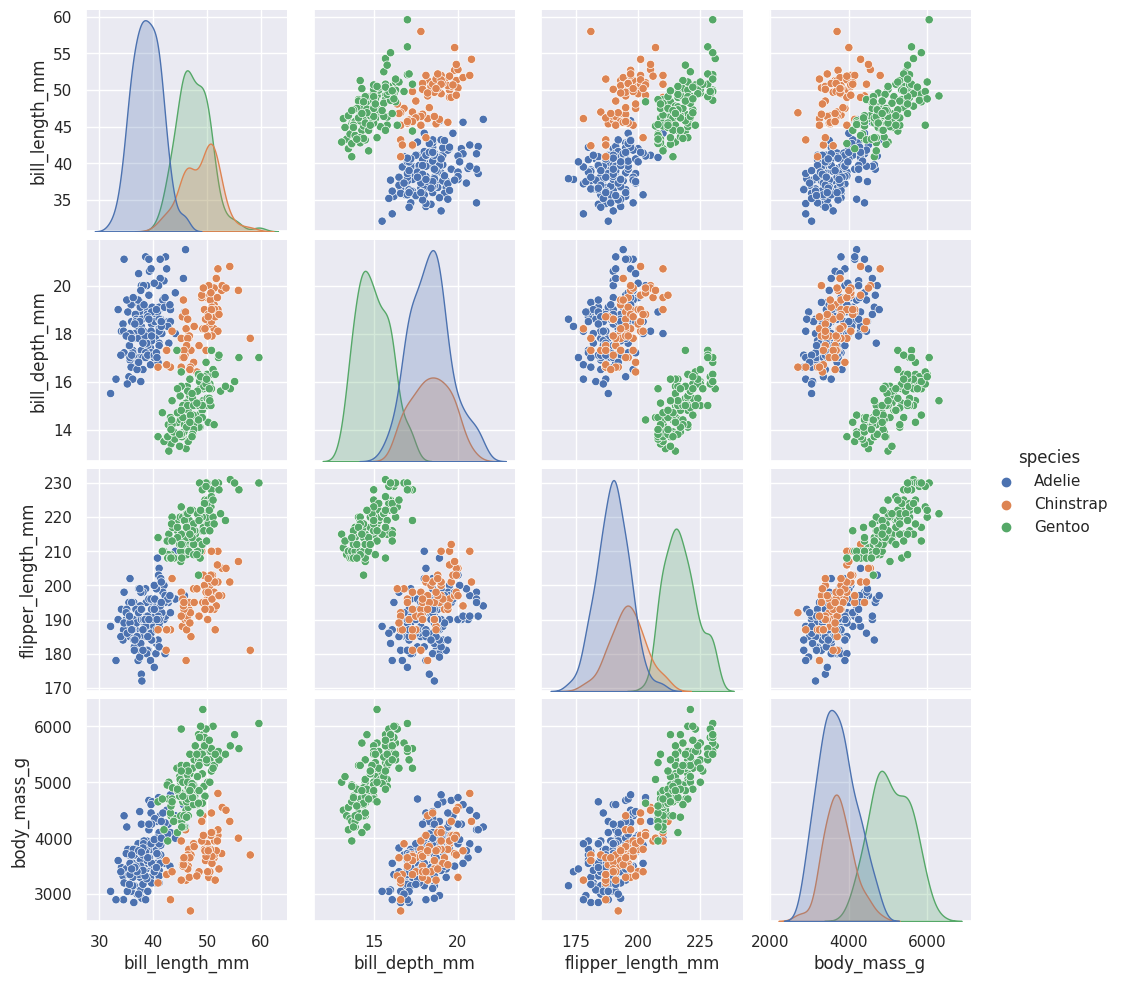

In [35]:
# pairplot(), takes a broader view: it shows joint and marginal distributions for all pairwise relationships and for each variable
sns.pairplot(data=df4, hue="species")

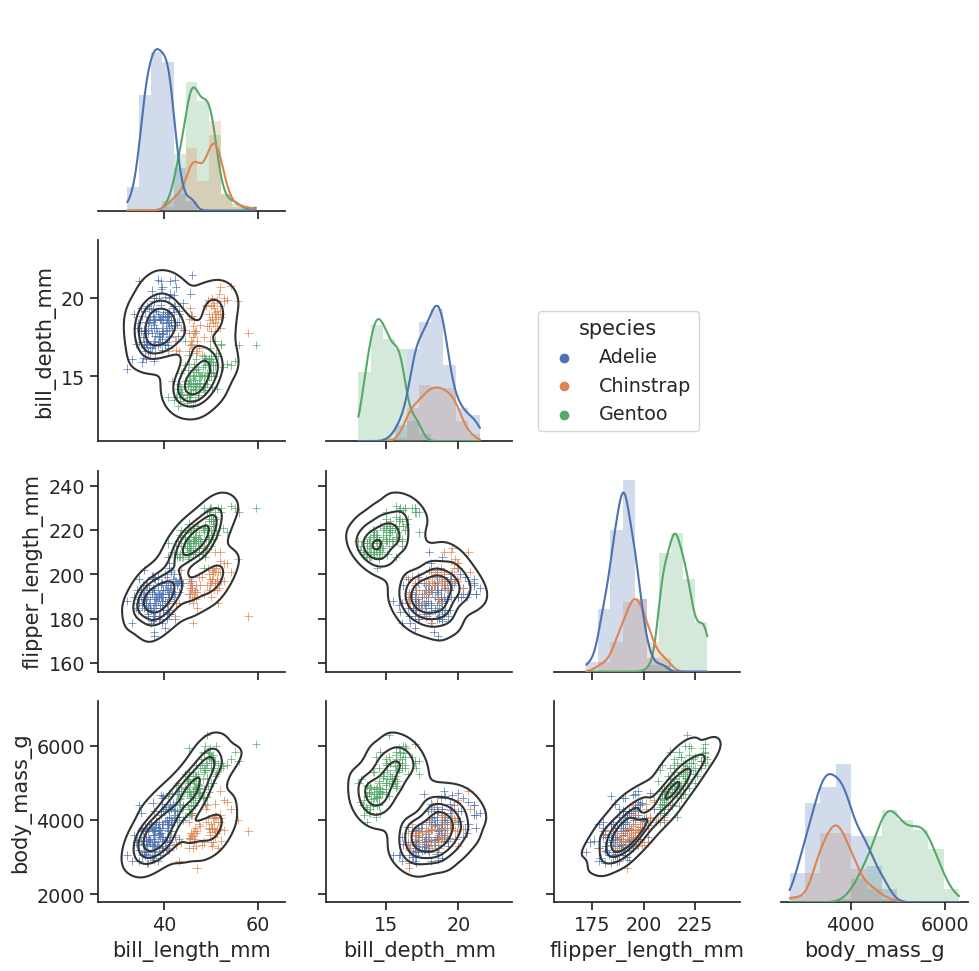

In [42]:
#@title Lower-level tools for building figures



g = sns.PairGrid(df4, hue="species", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

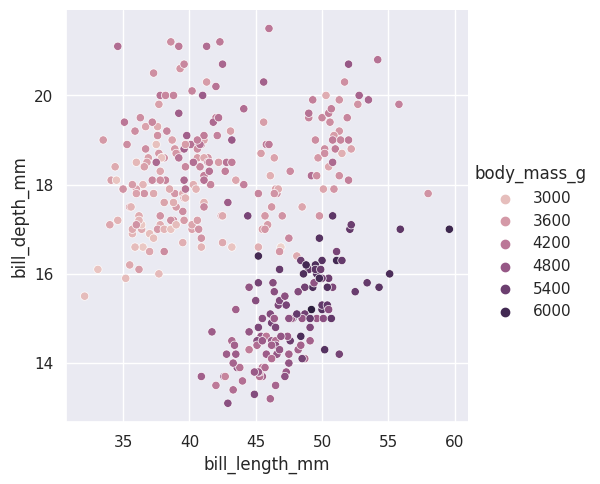

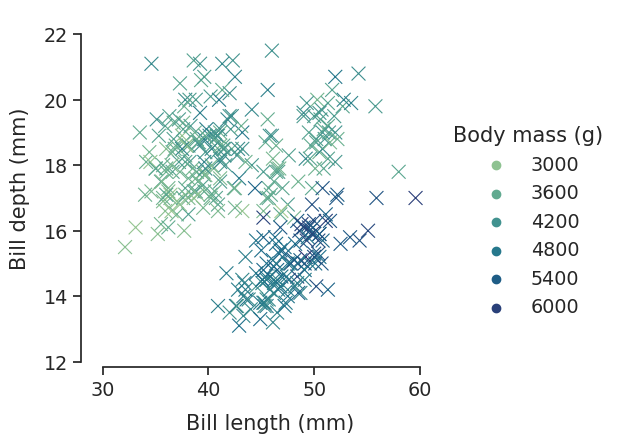

In [41]:
#@title Opinionated defaults and flexible customization
sns.relplot(
    data=df4,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g"
)
sns.set_theme(style="ticks", font_scale=1.25)
g = sns.relplot(
    data=df4,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g",
    palette="crest", marker="x", s=100,
)
g.set_axis_labels("Bill length (mm)", "Bill depth (mm)", labelpad=10)
g.legend.set_title("Body mass (g)")
g.figure.set_size_inches(6.5, 4.5)
g.ax.margins(.15)
g.despine(trim=True)